<a href="https://colab.research.google.com/github/Aishwarya2311/Deep-Learning/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')


Step 1: Read the dataset

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


Step 2: Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
df.duplicated().sum()

41

In [7]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [8]:
df = df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [9]:
df.duplicated().sum()

0

Seperate X and Y (PE)

In [10]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [11]:

X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [12]:


Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


Step 4: Preprocess X using pipeline

In [13]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')


In [16]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()



,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837



Apply Train Test split

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [18]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [19]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [20]:

xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [21]:

ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [22]:

xtrain.shape

(7621, 4)

In [23]:
xtest.shape

(1906, 4)

In [24]:

xtrain.shape[0]

7621

In [25]:

xtrain.shape[1]

4

Step 5: Build the neural network

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [27]:
# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation='relu'))

# Add Hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))

In [28]:
# Compile the model
model.compile(loss="mse", metrics=["mae"], optimizer="adam")

In [29]:
hist = model.fit(xtrain, ytrain,
                 validation_data=(xtest, ytest),
                 epochs=60)

Epoch 1/60
239/239 [==============================] - 4s 4ms/step - loss: 202672.6250 - mae: 449.8432 - val_loss: 193162.8906 - val_mae: 439.1012
Epoch 2/60
239/239 [==============================] - 1s 3ms/step - loss: 165752.9219 - mae: 405.3654 - val_loss: 127155.9922 - val_mae: 353.9526
Epoch 3/60
239/239 [==============================] - 1s 3ms/step - loss: 83518.4062 - mae: 276.0605 - val_loss: 44466.4922 - val_mae: 191.3753
Epoch 4/60
239/239 [==============================] - 1s 3ms/step - loss: 29065.2598 - mae: 147.5665 - val_loss: 19015.4531 - val_mae: 117.4494
Epoch 5/60
239/239 [==============================] - 1s 3ms/step - loss: 16260.5488 - mae: 109.4838 - val_loss: 12791.7979 - val_mae: 97.2909
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 11049.9658 - mae: 90.2426 - val_loss: 8588.7148 - val_mae: 79.2865
Epoch 7/60
239/239 [==============================] - 1s 5ms/step - loss: 7291.7749 - mae: 72.6405 - val_loss: 5508.2944 - val_mae: 62.8

In [30]:
hist.history["loss"]

[202672.625,
 165752.921875,
 83518.40625,
 29065.259765625,
 16260.548828125,
 11049.9658203125,
 7291.77490234375,
 4633.5224609375,
 2864.013916015625,
 1759.3802490234375,
 1108.0328369140625,
 724.6226806640625,
 486.62969970703125,
 333.12530517578125,
 230.8955841064453,
 161.3087158203125,
 115.09606170654297,
 83.6333999633789,
 62.66133499145508,
 48.925559997558594,
 40.38468933105469,
 35.275482177734375,
 32.06250762939453,
 29.76863670349121,
 28.202272415161133,
 26.907623291015625,
 25.922895431518555,
 25.14385414123535,
 24.326513290405273,
 23.768888473510742,
 23.170804977416992,
 22.89207649230957,
 22.405208587646484,
 22.098159790039062,
 21.911479949951172,
 21.788719177246094,
 21.45884895324707,
 21.276060104370117,
 21.2398738861084,
 21.029953002929688,
 20.9934139251709,
 20.867450714111328,
 20.75353240966797,
 20.53716468811035,
 20.53555679321289,
 20.612091064453125,
 20.43152618408203,
 20.524171829223633,
 20.420114517211914,
 20.344398498535156,
 20.

In [31]:
hist.history['val_loss']

[193162.890625,
 127155.9921875,
 44466.4921875,
 19015.453125,
 12791.7978515625,
 8588.71484375,
 5508.29443359375,
 3420.578369140625,
 2074.17578125,
 1270.5174560546875,
 816.0506591796875,
 538.6449584960938,
 365.7288818359375,
 253.4924774169922,
 179.44259643554688,
 125.1400375366211,
 90.66818237304688,
 68.67086029052734,
 51.36359405517578,
 41.498172760009766,
 35.66593551635742,
 31.88054847717285,
 30.018381118774414,
 27.844884872436523,
 26.829496383666992,
 25.740732192993164,
 25.00173568725586,
 24.12749671936035,
 23.612051010131836,
 23.143571853637695,
 22.79157066345215,
 22.566280364990234,
 22.684093475341797,
 21.78806495666504,
 21.938356399536133,
 21.50052833557129,
 21.06264305114746,
 21.275775909423828,
 20.778982162475586,
 21.173473358154297,
 20.492630004882812,
 20.74721908569336,
 20.770063400268555,
 21.16175079345703,
 20.31618309020996,
 20.137723922729492,
 20.736467361450195,
 20.23934555053711,
 20.39545440673828,
 20.379592895507812,
 19.89

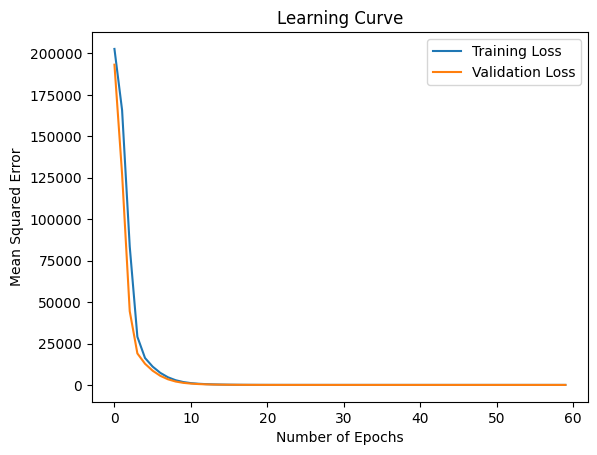

In [32]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [33]:

model.evaluate(xtrain, ytrain)

239/239 [==============================] - 1s 4ms/step - loss: 20.1169 - mae: 3.5234


[20.116897583007812, 3.5234451293945312]

In [34]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 4ms/step - loss: 19.9810 - mae: 3.5262


[19.98102569580078, 3.526158571243286]